In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
plt.rc('text', usetex=True)
np.set_printoptions(precision=4)


In [26]:
lincolni = !ls linc*.pgm
lincolni

['lincoln_L30_N00.pgm',
 'lincoln_L30_N10.pgm',
 'lincoln_L30_N20.pgm',
 'lincoln_L30_N30.pgm',
 'lincoln_L30_N40.pgm']

In [52]:
def preberi_pgm(filename):
    with open(filename, "r") as f:
        arej = f.readlines()
        druga_vrstica = arej[1]
        dim_x, dim_y = druga_vrstica.split()
        dim_x = int(dim_x)
        dim_y = int(dim_y)
        print(f"Resolucija: {dim_x}x{dim_y}")
        arej = arej[3:]
        rezultat=[]
        for i,vrstica in enumerate(arej):
            elementi = vrstica.split()
            for e in elementi:
                rezultat.append(int(e))
        rezultat = np.array(rezultat).astype(int)
        rezultat = rezultat.reshape((dim_x, dim_y))
        
        print(rezultat.shape)
        splittan_filename = filename.split(".")
        #print(splittan_filename)
        
        np.savetxt(f"{splittan_filename[0]}.csv",rezultat, delimiter=",", fmt="%3d")
        print(f"Končana obdelava {filename}.")
for filename in lincolni:
    preberi_pgm(filename)

Resolucija: 313x256
(313, 256)
Končana obdelava lincoln_L30_N00.pgm.
Resolucija: 313x256
(313, 256)
Končana obdelava lincoln_L30_N10.pgm.
Resolucija: 313x256
(313, 256)
Končana obdelava lincoln_L30_N20.pgm.
Resolucija: 313x256
(313, 256)
Končana obdelava lincoln_L30_N30.pgm.
Resolucija: 313x256
(313, 256)
Končana obdelava lincoln_L30_N40.pgm.


In [21]:
l0 = np.loadtxt("lincoln_L30_N00.csv", delimiter=",", dtype=int)
l1 = np.loadtxt("lincoln_L30_N10.csv", delimiter=",")
l2 = np.loadtxt("lincoln_L30_N20.csv", delimiter=",")
l3 = np.loadtxt("lincoln_L30_N30.csv", delimiter=",")
l4 = np.loadtxt("lincoln_L30_N40.csv", delimiter=",")

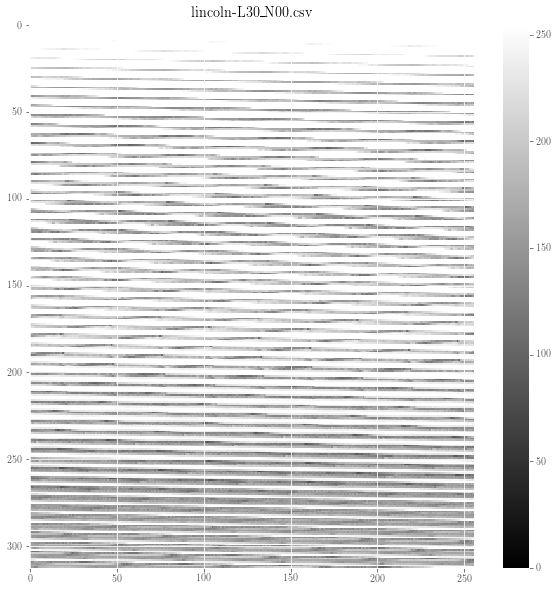

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(l0, cmap="gray",vmin=0, vmax=255)
plt.title("lincoln-L30\_N00.csv")

plt.colorbar()
plt.savefig("brisi.jpg")

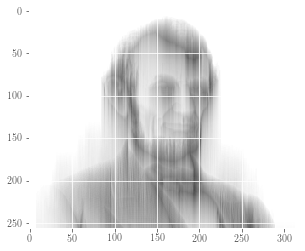

In [52]:

def preberi(filename):
    
    def readpgm(name):
        with open(name) as f:
             lines = f.readlines()

        # Ignores commented lines
        for l in list(lines):
                if l[0] == '#':
                    lines.remove(l)

        # Makes sure it is ASCII format (P2)
        assert lines[0].strip() == 'P2' 

        # Converts data to a list of integers
        data = []
        for line in lines[1:]:
            data.extend([int(c) for c in line.split()])

        return (np.array(data[3:]),(data[1],data[0]),data[2])
    data = readpgm(filename)
    return np.reshape(data[0],data[1])

l0 = preberi("lincoln_L30_N00.pgm")
l1 = preberi("lincoln_L30_N10.pgm")
l2 = preberi("lincoln_L30_N20.pgm")
l3 = preberi("lincoln_L30_N30.pgm")
l4 = preberi("lincoln_L30_N40.pgm")

plt.imshow(l0, cmap="gray", vmin=0)

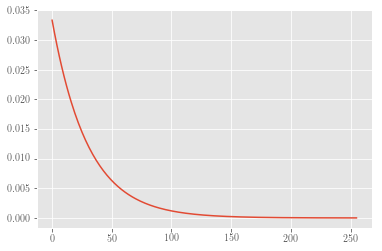

In [33]:
lincolni = {
    "N00":l0,
    "N10":l1,
    "N20":l2,
    "N30":l3,
    "N40":l4}

razpon = np.array(range(256))
tau = 30
r = np.exp(-razpon/tau)/tau


A znam nrdit spekter enga lincolna?

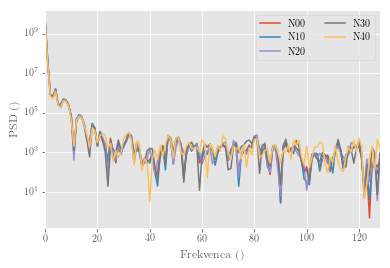

In [58]:
lincolni = {
    "N00":l0,
    "N10":l1,
    "N20":l2,
    "N30":l3,
    "N40":l4}
for ime, lincoln in lincolni.items():
    L = np.fft.fft(lincoln.T, axis=0)
    plt.plot(np.abs(np.mean(L, axis=1))**2, label=ime)
plt.xlim((0,256//2))
plt.legend(ncol=2)
plt.semilogy()
plt.xlabel("Frekvenca ()")
plt.ylabel("PSD ()")
plt.savefig("3-1-spektri-lincolnov.pdf")
plt.show()

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


Konec obdelave datoteke  N00
Konec obdelave datoteke  N10
Konec obdelave datoteke  N20
Konec obdelave datoteke  N30
Konec obdelave datoteke  N40


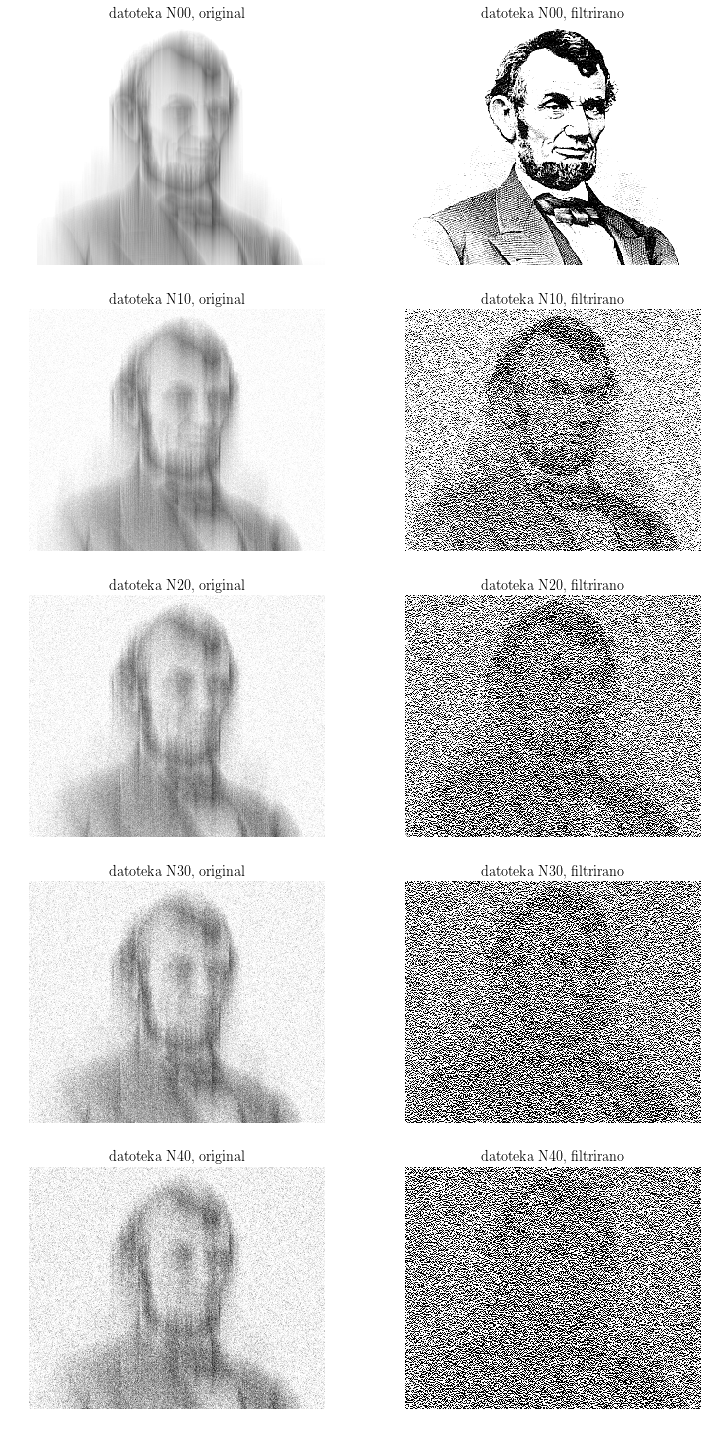

In [125]:
novi_lincolni = {}
gain_suma={
    "N00":10,
    "N10":10,
    "N20":10,
    "N30":10,
    "N40":10}
for ime, l in lincolni.items():
    nov_lincoln = np.empty_like(l.T)
    for i, stolpec in enumerate(l.T):
        #print(f"Dimenzije 'stolpca' so {stolpec.shape}")
        C = np.fft.fft(stolpec)
        s0 = np.fft.fft(lincolni["N00"].T[i])
        S = np.fft.fft(s0)
        N = np.full_like(C, gain_suma[ime]*np.median(C[60:]))
        Fi = (np.abs(S)**2)/(np.abs(S)**2+np.abs(N)**2)
        R = np.fft.fft(r)
        U = C * Fi / R
        u = np.fft.ifft(U)
        #print(f"Dimenzije 'u-ja' so {u.shape}")
        nov_lincoln[i] = u
    print("Konec obdelave datoteke ", ime)
    novi_lincolni[ime] = nov_lincoln.T
plt.figure(figsize=(11,20))

for ime, linc in lincolni.items():
    serijska = int(ime[-2])
    original_stevilka = "52"+str(2*serijska+1)
    plt.subplot(original_stevilka)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(lincolni[ime], cmap="gray", vmin=0, vmax=255)
    plt.title(f"datoteka {ime}, original")
    
    filtrirano_seznam = [5,2,2*serijska+2]
    plt.subplot(*filtrirano_seznam)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(novi_lincolni[ime], cmap="gray", vmin=50, vmax=200)
    plt.title(f"datoteka {ime}, filtrirano")
plt.tight_layout(w_pad=0.9)
#plt.savefig("3-2-primerjave.pdf")
plt.show()

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


Konec obdelave datoteke  N00
Konec obdelave datoteke  N10
Konec obdelave datoteke  N20
Konec obdelave datoteke  N30
Konec obdelave datoteke  N40


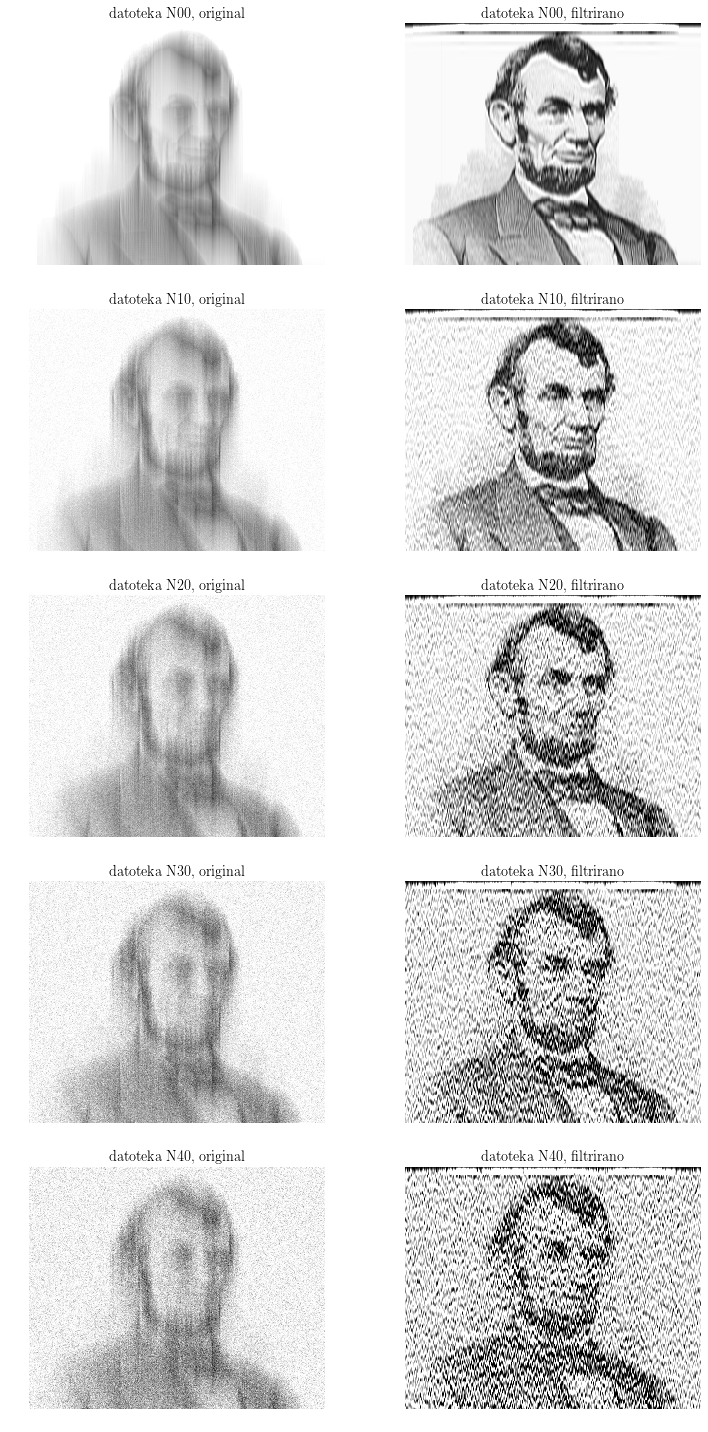

In [137]:
from scipy.signal import sosfilt, butter

#sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
#filtered = signal.sosfilt(sos, sig)

novi_lincolni = {}
gain_suma={
    "N00":10,
    "N10":10,
    "N20":10,
    "N30":10,
    "N40":10}
for ime, l in lincolni.items():
    nov_lincoln = np.empty_like(l.T)
    for i, stolpec in enumerate(l.T):
        #print(f"Dimenzije 'stolpca' so {stolpec.shape}")
        C = np.fft.fft(stolpec)
        s0 = np.fft.fft(lincolni["N00"].T[i])
        S = np.fft.fft(s0)
        N = np.full_like(C, gain_suma[ime]*np.median(C[60:]))
        Fi = (np.abs(S)**2)/(np.abs(S)**2+np.abs(N)**2)
        R = np.fft.fft(r)
        U = C * Fi / R
        u = np.fft.ifft(U)
        #print(f"Dimenzije 'u-ja' so {u.shape}")
        sos = butter(4, 0.2, 'lp', output='sos')
        u = sosfilt(sos, u)
        nov_lincoln[i] = u
    print("Konec obdelave datoteke ", ime)
    novi_lincolni[ime] = nov_lincoln.T
plt.figure(figsize=(11,20))

for ime, linc in lincolni.items():
    serijska = int(ime[-2])
    original_stevilka = "52"+str(2*serijska+1)
    plt.subplot(original_stevilka)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(lincolni[ime], cmap="gray", vmin=0, vmax=255)
    plt.title(f"datoteka {ime}, original")
    
    filtrirano_seznam = [5,2,2*serijska+2]
    plt.subplot(*filtrirano_seznam)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(novi_lincolni[ime], cmap="gray", vmin=0, vmax=256)
    plt.title(f"datoteka {ime}, filtrirano")
plt.tight_layout(w_pad=0.9)
plt.savefig("3-2-primerjave_poLP3.pdf")
plt.show()